# **LgithGBMRegressor Model Theory**


## Theory
LightGBMRegressor is a gradient boosting framework that uses decision trees for regression tasks, but it is optimized for speed and efficiency. It is designed to handle large datasets with high dimensionality and supports categorical features natively. LightGBM uses a technique called gradient-based one-side sampling (GOSS) and exclusive feature bundling (EFB) to speed up the training process while maintaining high accuracy.

The model function for LightGBMRegressor is similar to other gradient boosting algorithms, where the final prediction is a weighted sum of the predictions from all decision trees:

$$ f(x) = \sum_{t=1}^{T} \alpha_t h_t(x) $$

Where:
- $f(x)$ is the predicted output.
- $T$ is the number of trees.
- $\alpha_t$ is the weight of the $t$-th tree.
- $h_t(x)$ is the prediction of the $t$-th tree for input $x$.

## Model Training

### Forward Pass

In LightGBM, the forward pass builds decision trees iteratively. Each tree is trained to predict the residuals of the previous predictions, and the training process is accelerated using optimizations like GOSS and EFB. The goal is to correct the errors made by the previous trees in the ensemble.

### Cost Function

LightGBMRegressor typically uses the mean squared error (MSE) as the loss function for regression tasks. The objective function is:

$$ J(\alpha) = \frac{1}{m} \sum_{i=1}^{m}(f(x^{(i)}) - y^{(i)})^2 $$

Where:
- $J(\alpha)$ is the cost function (MSE).
- $m$ is the number of training examples.
- $f(x^{(i)})$ is the predicted output for the $i$-th example.
- $y^{(i)}$ is the actual output for the $i$-th example.

### Gradient Boosting

LightGBMRegressor applies gradient boosting using the gradient of the loss function to update the decision trees. It employs gradient-based one-side sampling (GOSS), which helps speed up the training process by focusing on the samples with large gradients, and exclusive feature bundling (EFB), which groups features that rarely appear together to reduce the dimensionality.

The update for each tree is similar to other gradient boosting algorithms:

$$ h_t(x) = -\frac{\partial J}{\partial f(x)} $$

Where:
- $h_t(x)$ is the tree added at stage $t$.
- $\frac{\partial J}{\partial f(x)}$ is the gradient of the cost function with respect to the prediction at each stage.

## Training Process

The training process in LightGBMRegressor involves the following steps:
1. **Initial prediction**: Start with an initial prediction, typically the mean of the target variable.
2. **Compute residuals**: Compute the residuals (errors) by subtracting the current predictions from the actual target values.
3. **Fit decision trees**: Fit decision trees to the residuals, using optimizations like GOSS and EFB to speed up the training.
4. **Update prediction**: Add the output of the new tree to the current prediction.
5. **Repeat**: Repeat the above steps for a predefined number of trees or until further improvement is minimal.

LightGBMRegressor also supports early stopping, where training can be halted if the model's performance stops improving on a validation set. It also has hyperparameters for controlling the learning rate, number of trees, tree depth, and regularization techniques to prevent overfitting.

By iteratively adding decision trees and using advanced optimizations, LightGBMRegressor can efficiently handle large datasets and complex patterns, while maintaining high accuracy in regression tasks.


## **Model Evaluation**

### 1. Mean Squared Error (MSE)

**Formula:**
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true}_i} - y_{\text{pred}_i})^2
$$

**Description:**
- **Mean Squared Error (MSE)** is a widely used metric for evaluating the accuracy of regression models.
- It measures the average squared difference between the predicted values ($y_{\text{pred}}$) and the actual target values ($y_{\text{true}}$).
- The squared differences are averaged across all data points in the dataset.

**Interpretation:**
- A lower MSE indicates a better fit of the model to the data, as it means the model's predictions are closer to the actual values.
- MSE is sensitive to outliers because the squared differences magnify the impact of large errors.
- **Limitations:**
  - MSE can be hard to interpret because it is in squared units of the target variable.
  - It disproportionately penalizes larger errors due to the squaring process.

---

### 2. Root Mean Squared Error (RMSE)

**Formula:**
$$
\text{RMSE} = \sqrt{\text{MSE}}
$$

**Description:**
- **Root Mean Squared Error (RMSE)** is a variant of MSE that provides the square root of the average squared difference between predicted and actual values.
- It is often preferred because it is in the same unit as the target variable, making it more interpretable.

**Interpretation:**
- Like MSE, a lower RMSE indicates a better fit of the model to the data.
- RMSE is also sensitive to outliers due to the square root operation.
- **Advantages over MSE:**
  - RMSE provides a more intuitive interpretation since it is in the same scale as the target variable.
  - It can be more directly compared to the values of the actual data.

---

### 3. R-squared ($R^2$)

**Formula:**
$$
R^2 = 1 - \frac{\text{SSR}}{\text{SST}}
$$

**Description:**
- **R-squared ($R^2$)**, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable ($y_{\text{true}}$) that is predictable from the independent variable(s) ($y_{\text{pred}}$) in a regression model.
- It ranges from 0 to 1, where 0 indicates that the model does not explain any variance, and 1 indicates a perfect fit.

**Interpretation:**
- A higher $R^2$ value suggests that the model explains a larger proportion of the variance in the target variable.
- However, $R^2$ does not provide information about the goodness of individual predictions or whether the model is overfitting or underfitting.
- **Limitations:**
  - $R^2$ can be misleading in cases of overfitting, especially with polynomial regression models. Even if $R^2$ is high, the model may not generalize well to unseen data.
  - It doesn’t penalize for adding irrelevant predictors, so adjusted $R^2$ is often preferred for models with multiple predictors.

---

### 4. Adjusted R-squared

**Formula:**
$$
\text{Adjusted } R^2 = 1 - \left(1 - R^2\right) \frac{n-1}{n-p-1}
$$
where \(n\) is the number of data points and \(p\) is the number of predictors.

**Description:**
- **Adjusted R-squared** adjusts the R-squared value to account for the number of predictors in the model, helping to prevent overfitting when adding more terms to the model.
- Unlike $R^2$, it can decrease if the additional predictors do not improve the model significantly.

**Interpretation:**
- A higher adjusted $R^2$ suggests that the model is not just overfitting, but has genuine explanatory power with the number of predictors taken into account.
- It is especially useful when comparing models with different numbers of predictors.

---

### 5. Mean Absolute Error (MAE)

**Formula:**
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_{\text{true}_i} - y_{\text{pred}_i}|
$$

**Description:**
- **Mean Absolute Error (MAE)** measures the average of the absolute errors between the predicted and actual values.
- Unlike MSE and RMSE, MAE is not sensitive to outliers because it does not square the errors.

**Interpretation:**
- MAE provides a straightforward understanding of the average error magnitude.
- A lower MAE suggests better model accuracy, but it may not highlight the impact of large errors as much as MSE or RMSE.

## LightGBM template [LightGBM: LGBMRegressor](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html)

### class lightgbm.LGBMRegressor(*, boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=1e-3, min_child_samples=20, subsample=1.0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=-1, silent=False, importance_type='split')

| **Parameter**          | **Description**                                                                                                                                                                | **Default**     |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------|
| `boosting_type`        | Type of boosting model. Options: 'gbdt', 'dart', 'goss', 'rf'.                                                                                                                 | `'gbdt'`        |
| `num_leaves`           | Maximum number of leaves in one tree.                                                                                                                                            | `31`            |
| `max_depth`            | Maximum depth of a tree. -1 means no limit.                                                                                                                                     | `-1`            |
| `learning_rate`        | Step size shrinking to prevent overfitting.                                                                                                                                     | `0.1`           |
| `n_estimators`         | Number of boosting iterations (trees).                                                                                                                                         | `100`           |
| `subsample_for_bin`    | Number of data points used for constructing histograms in the algorithm.                                                                                                       | `200000`        |
| `objective`            | Objective function. For regression, use 'regression' or other options.                                                                                                         | `None`          |
| `class_weight`         | Class weights for classification tasks.                                                                                                                                         | `None`          |
| `min_split_gain`       | Minimum gain to make a further partition.                                                                                                                                       | `0.0`           |
| `min_child_weight`     | Minimum sum of weights (or samples) in a child.                                                                                                                                 | `1e-3`          |
| `min_child_samples`    | Minimum number of samples required to be in a child.                                                                                                                           | `20`            |
| `subsample`            | Fraction of samples used for fitting each tree.                                                                                                                                 | `1.0`           |
| `colsample_bytree`     | Fraction of features to consider for each tree.                                                                                                                                | `1.0`           |
| `reg_alpha`            | L1 regularization term on weights.                                                                                                                                              | `0.0`           |
| `reg_lambda`           | L2 regularization term on weights.                                                                                                                                              | `0.0`           |
| `random_state`         | Seed for reproducibility.                                                                                                                                                       | `None`          |
| `n_jobs`               | Number of parallel threads used for training.                                                                                                                                   | `-1`            |
| `silent`               | Whether to suppress output messages.                                                                                                                                             | `False`         |
| `importance_type`      | The method to calculate feature importance. Options: 'split', 'gain'.                                                                                                          | `'split'`       |

-

| **Attribute**          | **Description**                                                                                                                                                                |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `best_iteration_`      | Number of iterations chosen based on early stopping.                                                                                                                            |
| `feature_importances_` | Feature importances based on the splitting criterion (if `importance_type='split'`) or the total gain (if `importance_type='gain'`).                                           |
| `n_features_in_`       | Number of features seen during fitting.                                                                                                                                         |
| `booster_`             | The trained booster (LightGBM model object).                                                                                                                                   |

-

| **Method**             | **Description**                                                                                                                                                                |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `fit(X, y)`            | Fit the model to the training data `X` and target values `y`.                                                                                                                 |
| `predict(X)`           | Predict regression target for the input data `X`.                                                                                                                              |
| `score(X, y)`          | Return the R² score for the prediction.                                                                                                                                         |
| `get_params()`         | Get the parameters of the LGBMRegressor model.                                                                                                                                   |
| `set_params(**params)` | Set the parameters of the LGBMRegressor model.                                                                                                                                   |
| `feature_importances_` | Returns the importance of features based on training.                                                                                                                           |



# KNN regression - Example

## Data loading

In [1]:
# Loading Libraries
import pandas as pd # for data analysis

%matplotlib inline

diamondprediction_eda=pd.read_csv('./data/diamonds.csv')

diamondprediction_eda.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


##  Data processing

In [2]:
# Identify Duplicate Records
duplicate_records = diamondprediction_eda[diamondprediction_eda.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicate_records))
print(diamondprediction_eda.shape)
print(duplicate_records.head(2))

Duplicate Rows except first occurrence based on all columns are :
0
(53940, 11)
Empty DataFrame
Columns: [Unnamed: 0, carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []


In [3]:
diamondprediction_eda.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [4]:
# Analysis of Non-numerical columns
diamondprediction_eda.describe(include=['O'])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [5]:
# Cut Types
# cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
print(diamondprediction_eda['cut'].unique())
print("Type of Cuts: %s" % (diamondprediction_eda['cut'].nunique()))
print(diamondprediction_eda['cut'].value_counts())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Type of Cuts: 5
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64


In [6]:
# Mean Encoding technique has been choosen to ensure better encoding amoung other technique's based on the above plots.
# Verified the top 2 sample data after mean-encoding technique.
mean_encode_cut = diamondprediction_eda.groupby('cut')['price'].mean()
mean_encode_color = diamondprediction_eda.groupby('color')['price'].mean()
mean_encode_clarity = diamondprediction_eda.groupby('clarity')['price'].mean()
diamondprediction_eda.loc[:,'cut_mean_enc']=diamondprediction_eda['cut'].map(mean_encode_cut)
diamondprediction_eda.loc[:,'color_mean_enc']=diamondprediction_eda['color'].map(mean_encode_color)
diamondprediction_eda.loc[:,'clarity_mean_enc']=diamondprediction_eda['clarity'].map(mean_encode_clarity)
diamondprediction_eda.head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,cut_mean_enc,color_mean_enc,clarity_mean_enc
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,3457.541970,3076.752475,5063.028606
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4584.257704,3076.752475,3996.001148


In [7]:
# Drop categorical variables
diamondprediction_eda=diamondprediction_eda.drop(['cut','color','clarity'],axis=1)
diamondprediction_eda.rename(columns = {'cut_mean_enc':'cut'}, inplace = True)
diamondprediction_eda.rename(columns = {'color_mean_enc':'color'}, inplace = True)
diamondprediction_eda.rename(columns = {'clarity_mean_enc':'clarity'}, inplace = True)
diamondprediction_eda.head(2)

,Unnamed: 0,carat,depth,table,price,x,y,z,cut,color,clarity
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,3457.541970,3076.752475,5063.028606
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,4584.257704,3076.752475,3996.001148


In [8]:
# Removing (statistical) outliers for dataset
print(diamondprediction_eda.shape)
Q1 = diamondprediction_eda.quantile(0.25) #(0.19485)
#print(Q1)
Q3 = diamondprediction_eda.quantile(0.75) #(0.80515)
#print(Q3)
IQR = Q3 - Q1
#print(IQR)
diamondprediction_eda_outliers = diamondprediction_eda[~((diamondprediction_eda < (Q1 - 1.5 * IQR)) |(diamondprediction_eda > (Q3 + 1.5 * IQR))).any(axis=1)]
print(diamondprediction_eda_outliers.shape)

(53940, 11)
(30326, 11)


## Plotting data

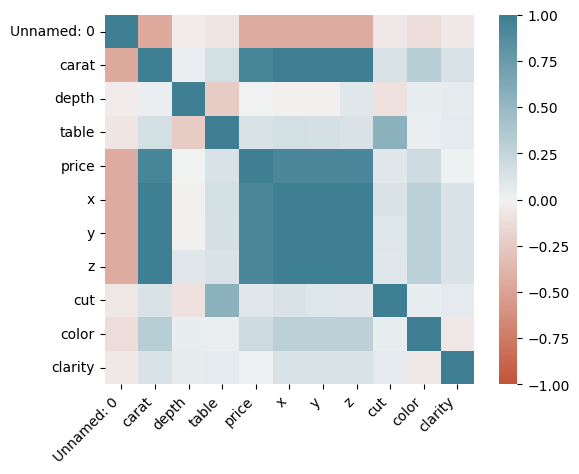

In [9]:
import seaborn as sns # for statistical plotting
import matplotlib.pyplot as plt # for plotting

# Generated HeatMap after removal of outliers and you can see the difference clearly here.
corr = diamondprediction_eda_outliers.corr()
ax = sns.heatmap( corr,vmin=-1, vmax=1, center=0,  cmap=sns.diverging_palette(20, 220, n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

## Model definition

In [10]:
X=diamondprediction_eda_outliers.drop(['price'],axis=1)
Y=diamondprediction_eda_outliers['price']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [13]:
import lightgbm
from sklearn.model_selection import cross_val_score

# LightGBM Regressor
lgbm_reg = lightgbm.LGBMRegressor()
lgbm_reg.fit(X_train, y_train)

# Cross-validation
cross_validation_accuracy = cross_val_score(estimator=lgbm_reg, X=X_train, y=y_train, cv=5, verbose=1)

# Predictions
y_pred = lgbm_reg.predict(X_test)

ModuleNotFoundError: No module named 'lightgbm'

## Model evaulation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared

# Print evaluation results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 1305385.8342316994
Root Mean Squared Error (RMSE): 1142.5348284545637
Mean Absolute Error (MAE): 396.01415695757305
R-squared (R2): 0.8297239754333654
